In [121]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [122]:
os.chdir('C:\\Users\\anush\\OneDrive\\Desktop\\Python Case Study\\Case Study 4 - Python Visualizations Case Study')
pharma_df = pd.read_csv('SalesData.csv')

In [205]:
pharma_df = pharma_df[(pharma_df.Sales2016 > 0) & (pharma_df.Sales2015 > 0)]

#### 1. Compare Sales by region for 2016 with 2015 using bar chart 

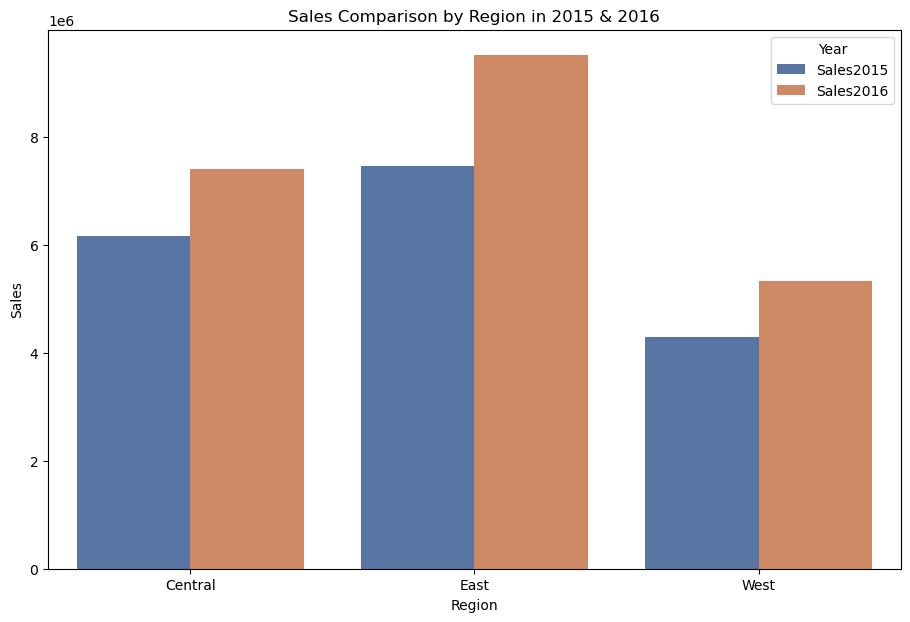

In [206]:
grouped_df = pharma_df[['Region','Sales2015','Sales2016']].groupby(by='Region').sum().reset_index()
melted_df = grouped_df.melt(id_vars='Region',value_vars=['Sales2015','Sales2016'],var_name='Year',value_name='Sales')
plt.figure(figsize=(11,7))
sns.barplot(data=melted_df,x='Region',y='Sales',hue='Year',palette='deep')
plt.title('Sales Comparison by Region in 2015 & 2016')
plt.show()

#### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

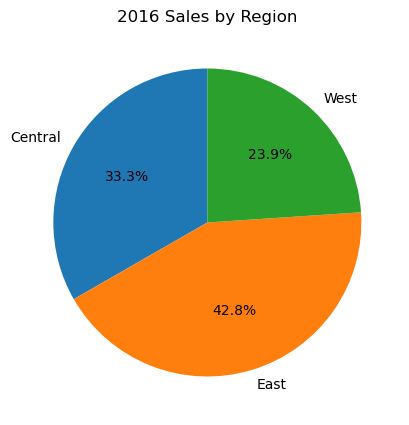

In [207]:
filtered_df = pharma_df[pharma_df.Sales2016 >= 0]
sales16_df = filtered_df[['Region','Sales2016']].groupby(by='Region').sum().reset_index()
plt.figure(figsize=(10,5))
plt.pie(x=sales16_df.Sales2016,labels=sales16_df.Region,autopct='%1.1f%%',startangle=90)
plt.title('2016 Sales by Region')
plt.show()

#### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers 

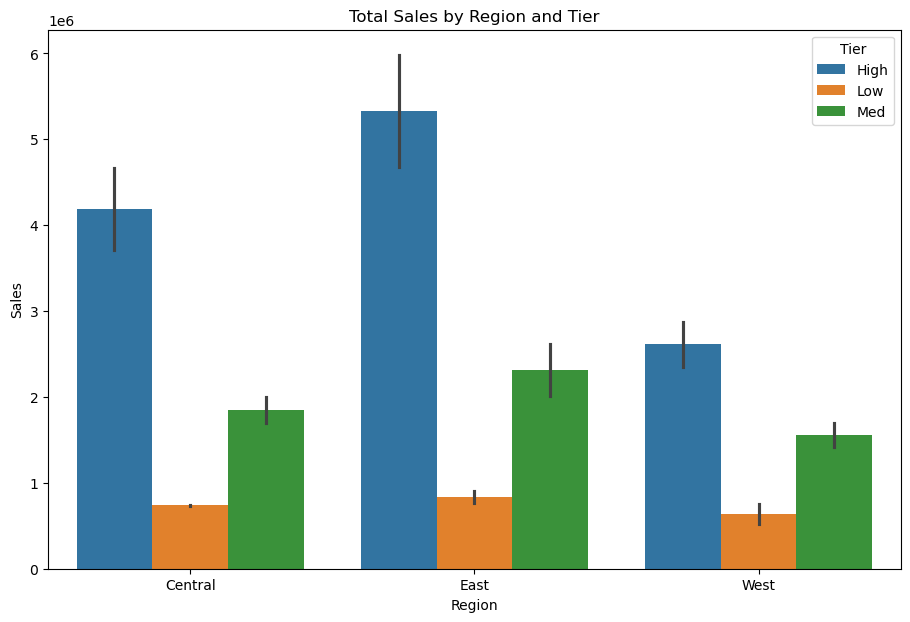

In [208]:
melted_df = pharma_df.melt(id_vars=['Region','Tier'],value_vars=['Sales2015','Sales2016'],var_name='Year',value_name='Sales')
grouped_df = melted_df[['Region','Tier','Sales','Year']].groupby(by=['Region','Tier','Year']).sum()
plt.figure(figsize=(11,7))
sns.barplot(data=grouped_df,x='Region',y='Sales',hue='Tier')
plt.title('Total Sales by Region and Tier')
plt.show()

#### 4. In East region, which state registered a decline in 2016 as compared to 2015?

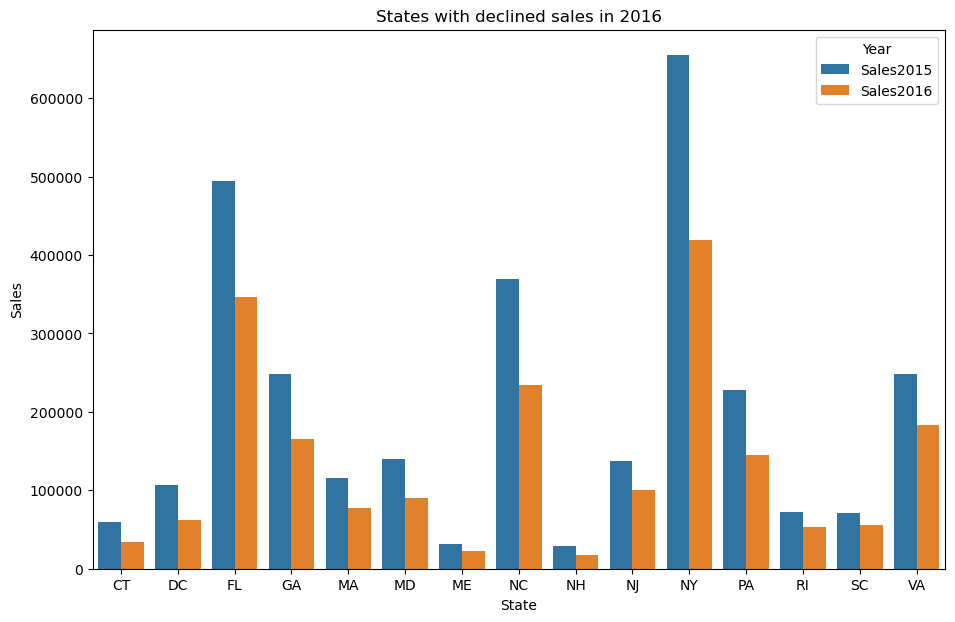

In [209]:
declined_sales_east = pharma_df[(pharma_df.Region == 'East') & (pharma_df.Sales2016 < pharma_df.Sales2015)]
melted_df = declined_sales_east.melt(id_vars='State',value_vars=['Sales2015','Sales2016'],var_name='Year',value_name='Sales')
grouped_df = melted_df.groupby(by=['State','Year']).sum().reset_index()
plt.figure(figsize=(11,7))
sns.barplot(data=grouped_df,x='State',y='Sales',hue='Year')
plt.title('States with declined sales in 2016')
plt.show()

#### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

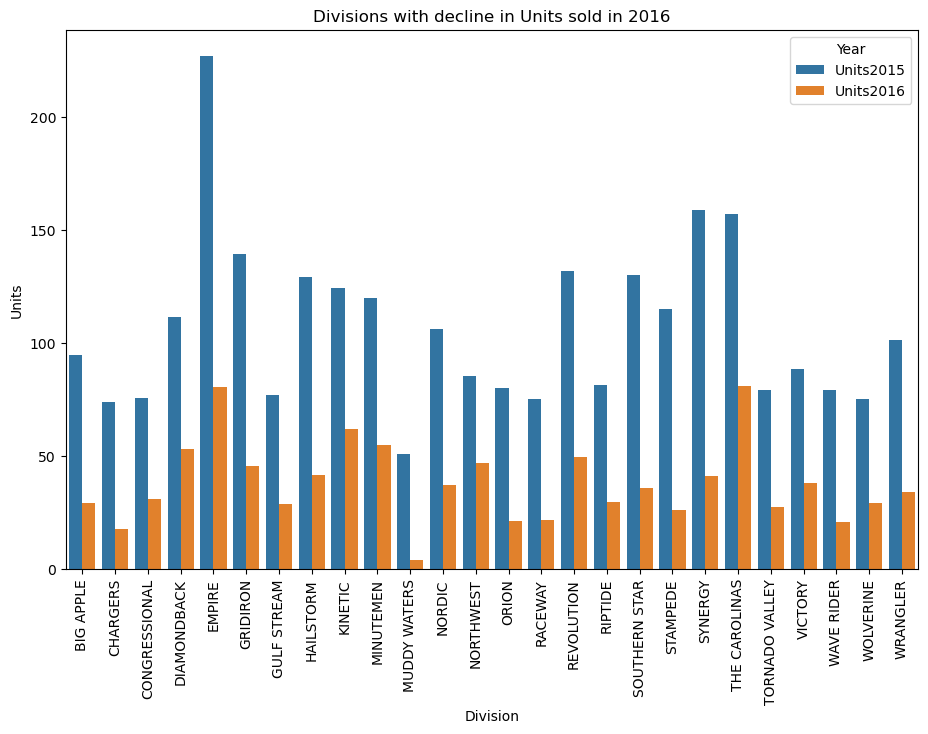

In [196]:
filtered_df = pharma_df[(pharma_df.Tier == 'High') & (pharma_df.Units2016 < pharma_df.Units2015)]
melted_df = filtered_df.melt(id_vars='Division',value_vars=['Units2015','Units2016'],var_name='Year',value_name='Units')
grouped_df = melted_df.groupby(by=['Year','Division']).sum()
plt.figure(figsize=(11,7))
sns.barplot(data=grouped_df,x='Division',y='Units',hue='Year')
plt.title('Divisions with decline in Units sold in 2016')
plt.xticks(rotation=90)
plt.show()

#### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as - 
#### • Jan - Mar : Q1 
#### • Apr - Jun : Q2 
#### • Jul - Sep : Q3 
#### • Oct - Dec : Q4    

In [186]:
pharma_df['Qtr'] = np.where(pharma_df.Month.isin(['Jan','Feb','Mar']),'Q1',np.where(pharma_df.Month.isin(['Apr','May','Jun']),'Q2',np.where(pharma_df.Month.isin(['Jul','Aug','Sep']),'Q3','Q4')))

#### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot 

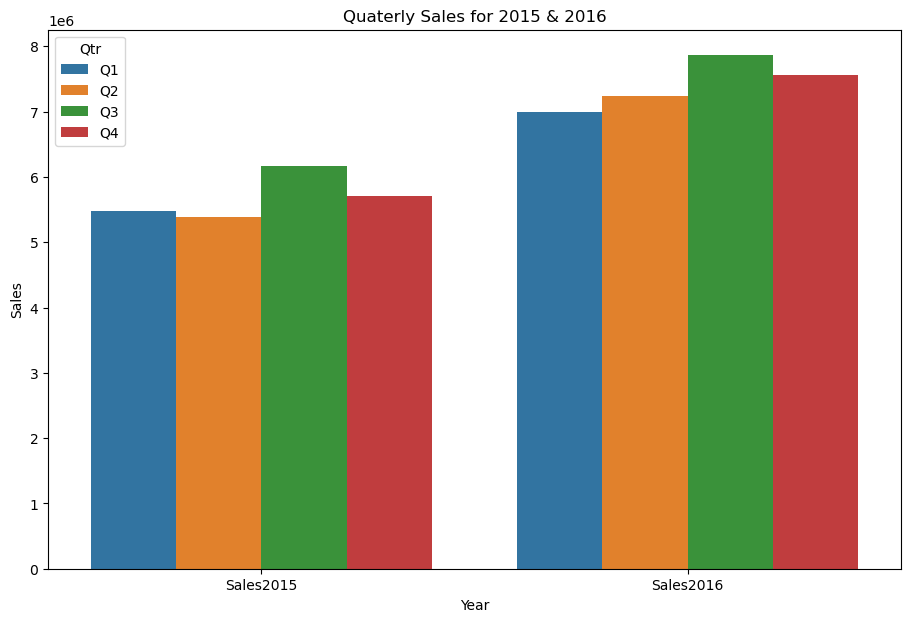

In [195]:
melted_df = pharma_df.melt(id_vars='Qtr',value_vars=['Sales2016','Sales2015'],var_name='Year',value_name='Sales')
quaterly_sales = melted_df.groupby(by=['Year','Qtr']).sum()
plt.figure(figsize=(11,7))
sns.barplot(data=quaterly_sales,x='Year',y='Sales',hue='Qtr')
plt.title('Quaterly Sales for 2015 & 2016')
plt.show()

#### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart. (Draw 4 pie charts representing a Quarter for each Tier) 

In [232]:
quarters = pharma_df[['Qtr','Tier','Sales2016']].groupby(by=['Qtr','Tier']).sum().reset_index()
qtrs = quarters.Qtr.unique()

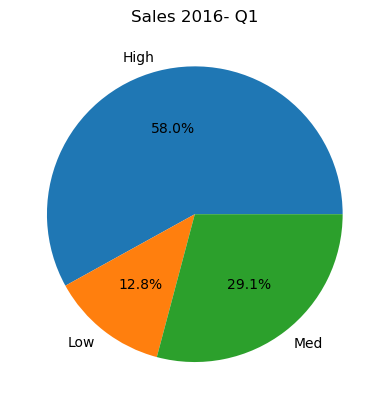

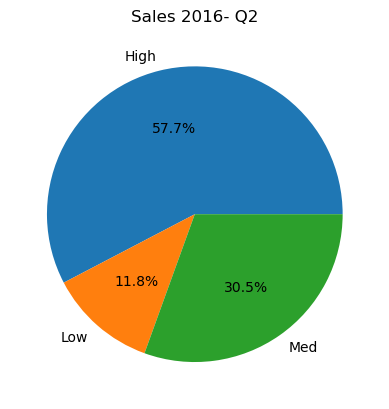

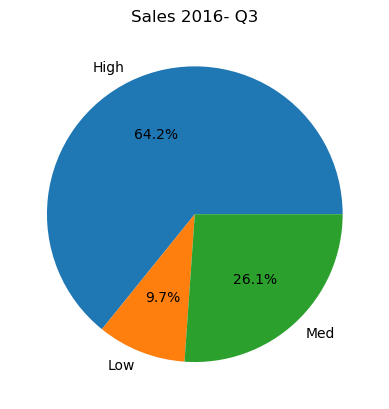

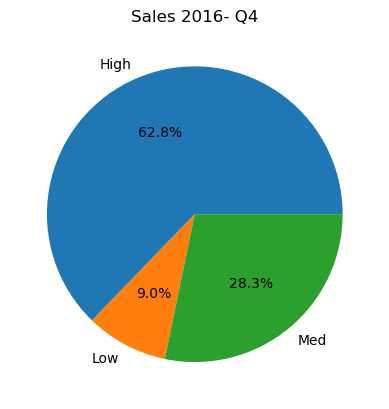

In [235]:
for q in qtrs:
    grouped_df = quarters[quarters.Qtr == q][['Tier','Sales2016']].groupby(by='Tier').sum().reset_index()
    plt.pie(grouped_df.Sales2016,labels=grouped_df.Tier,autopct='%1.1f%%')
    plt.title(f'Sales 2016- {q}')
    plt.show()

In [225]:
Q1_df = pharma_df[pharma_df.Qtr == 'Q1']
Q2_df = pharma_df[pharma_df.Qtr == 'Q2']
Q3_df = pharma_df[pharma_df.Qtr == 'Q3']
Q4_df = pharma_df[pharma_df.Qtr == 'Q4']
quarter_dfs = [Q1_df, Q2_df, Q3_df, Q4_df]

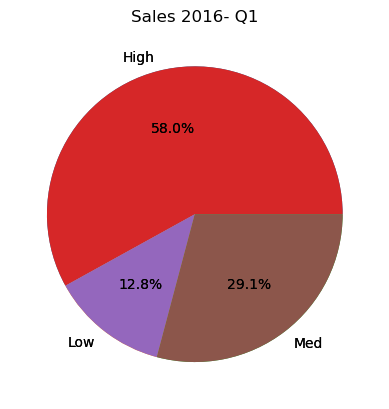

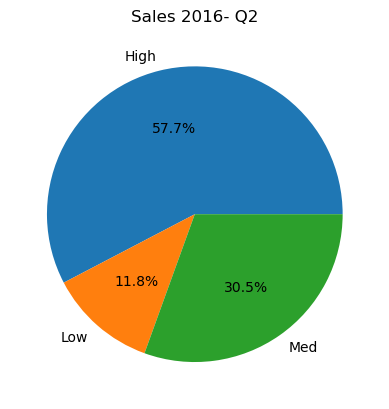

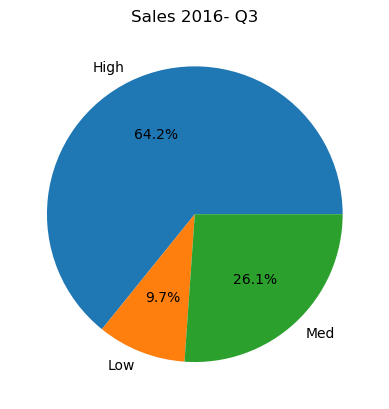

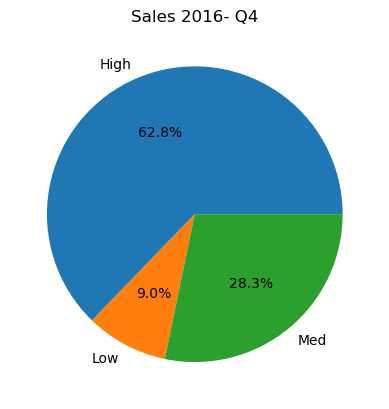

In [224]:
for i, qdf in enumerate(quarter_dfs):
    grouped_df = qdf[['Tier','Sales2016']].groupby(by='Tier').sum().reset_index()
    plt.pie(grouped_df.Sales2016,labels=grouped_df.Tier,autopct='%1.1f%%')
    plt.title(f'Sales 2016- Q{i + 1}')
    plt.show()